In [2]:
# 大小盘轮动
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
import datetime
import glob

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
sh50_files = sorted(glob.glob("../sh_etf_data/sh510050_*.5.tsv"))
sh1000_files =sorted( glob.glob("../sh_etf_data/sh512100_*.5.tsv"))
sh50_files

['../sh_etf_data/sh510050_221126.5.tsv',
 '../sh_etf_data/sh510050_221203.5.tsv',
 '../sh_etf_data/sh510050_221224.5.tsv',
 '../sh_etf_data/sh510050_230127.5.tsv']

In [4]:
sh50_pd = pd.read_table(sh50_files[0], header=0, index_col=0,parse_dates=["day"])
for f in sh50_files[1:]:
    add_pd = pd.read_table(f, header=0, index_col=0,parse_dates=["day"])
    add_pd = add_pd[add_pd["day"] > list(sh50_pd["day"])[-1]] 
    sh50_pd = sh50_pd.append(add_pd)
    
sh1000_pd = pd.read_table(sh1000_files[0], header=0, index_col=0,parse_dates=["day"])
for f in sh1000_files[1:]:
    add_pd = pd.read_table(f, header=0, index_col=0,parse_dates=["day"])
    add_pd = add_pd[add_pd["day"] > list(sh1000_pd["day"])[-1]] 
    sh1000_pd = sh1000_pd.append(add_pd)
    
sh50_pd.reset_index(drop=True, inplace=True)
sh1000_pd.reset_index(drop=True, inplace=True)
sh50_pd

,day,open,high,low,close,volume
0,2022-10-27 13:50:00,2.433,2.444,2.431,2.440,28313400
1,2022-10-27 13:55:00,2.439,2.444,2.438,2.438,17496500
2,2022-10-27 14:00:00,2.438,2.441,2.433,2.434,17063200
3,2022-10-27 14:05:00,2.434,2.434,2.427,2.428,14710500
4,2022-10-27 14:10:00,2.428,2.429,2.425,2.428,14198100
...,...,...,...,...,...,...
2890,2023-01-20 14:40:00,2.846,2.847,2.844,2.844,4010900
2891,2023-01-20 14:45:00,2.845,2.845,2.840,2.840,7261700
2892,2023-01-20 14:50:00,2.841,2.843,2.840,2.843,8830900
2893,2023-01-20 14:55:00,2.843,2.844,2.841,2.844,13546958


In [116]:
df2 = sh1000_pd
df2["mean_6"] = df2["close"].rolling(6, min_periods=1).mean()
df2["mean_24"]=  df2["close"].rolling(24, min_periods=1).mean()
df2["mean_96"]=  df2["close"].rolling(96, min_periods=1).mean()
df2["mean_384"]=  df2["close"].rolling(384, min_periods=1).mean()
df2["mean_1536"]=  df2["close"].rolling(1536, min_periods=1).mean()

In [117]:
df2["amp"] = df2["close"].pct_change()
df2


,day,open,high,low,close,volume,mean_6,mean_24,mean_96,mean_384,mean_1536,amp
0,2022-10-27 13:50:00,2.602,2.609,2.600,2.606,14529223,2.606000,2.606000,2.606000,2.606000,2.606000,NaN
1,2022-10-27 13:55:00,2.606,2.613,2.605,2.610,11355820,2.608000,2.608000,2.608000,2.608000,2.608000,0.001535
2,2022-10-27 14:00:00,2.610,2.613,2.604,2.606,7950400,2.607333,2.607333,2.607333,2.607333,2.607333,-0.001533
3,2022-10-27 14:05:00,2.606,2.607,2.600,2.600,5840100,2.605500,2.605500,2.605500,2.605500,2.605500,-0.002302
4,2022-10-27 14:10:00,2.599,2.602,2.598,2.601,11088800,2.604600,2.604600,2.604600,2.604600,2.604600,0.000385
...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2023-01-20 14:40:00,2.695,2.695,2.693,2.695,28345900,2.691833,2.689000,2.671104,2.632573,2.590104,0.000000
2891,2023-01-20 14:45:00,2.694,2.694,2.692,2.693,25983717,2.692667,2.689250,2.671615,2.632786,2.590117,-0.000742
2892,2023-01-20 14:50:00,2.693,2.694,2.691,2.693,12806802,2.693500,2.689792,2.672146,2.633005,2.590130,0.000000
2893,2023-01-20 14:55:00,2.692,2.693,2.690,2.692,13566455,2.693667,2.690208,2.672656,2.633219,2.590141,-0.000371


In [11]:
df2["mean_24"] >df2["mean_96"]

0       False
1       False
2       False
3       False
4       False
        ...  
2890     True
2891     True
2892     True
2893     True
2894     True
Length: 2895, dtype: bool

In [118]:
df2["stra_1"] = "stop"
df2["stra_1_amp"] = 0.0
df2["stra_2"] = "stop"
df2["stra_2_amp"] = 0.0
df2["stra_3"] = "stop"
df2["stra_3_amp"] = 0.0
df2["stra_4"] = "stop"
df2["stra_4_amp"] = 0.0
df2

,day,open,high,low,close,volume,mean_6,mean_24,mean_96,mean_384,mean_1536,amp,stra_1,stra_1_amp,stra_2,stra_2_amp,stra_3,stra_3_amp,stra_4,stra_4_amp
0,2022-10-27 13:50:00,2.602,2.609,2.600,2.606,14529223,2.606000,2.606000,2.606000,2.606000,2.606000,NaN,stop,0.0,stop,0.0,stop,0.0,stop,0.0
1,2022-10-27 13:55:00,2.606,2.613,2.605,2.610,11355820,2.608000,2.608000,2.608000,2.608000,2.608000,0.001535,stop,0.0,stop,0.0,stop,0.0,stop,0.0
2,2022-10-27 14:00:00,2.610,2.613,2.604,2.606,7950400,2.607333,2.607333,2.607333,2.607333,2.607333,-0.001533,stop,0.0,stop,0.0,stop,0.0,stop,0.0
3,2022-10-27 14:05:00,2.606,2.607,2.600,2.600,5840100,2.605500,2.605500,2.605500,2.605500,2.605500,-0.002302,stop,0.0,stop,0.0,stop,0.0,stop,0.0
4,2022-10-27 14:10:00,2.599,2.602,2.598,2.601,11088800,2.604600,2.604600,2.604600,2.604600,2.604600,0.000385,stop,0.0,stop,0.0,stop,0.0,stop,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2023-01-20 14:40:00,2.695,2.695,2.693,2.695,28345900,2.691833,2.689000,2.671104,2.632573,2.590104,0.000000,stop,0.0,stop,0.0,stop,0.0,stop,0.0
2891,2023-01-20 14:45:00,2.694,2.694,2.692,2.693,25983717,2.692667,2.689250,2.671615,2.632786,2.590117,-0.000742,stop,0.0,stop,0.0,stop,0.0,stop,0.0
2892,2023-01-20 14:50:00,2.693,2.694,2.691,2.693,12806802,2.693500,2.689792,2.672146,2.633005,2.590130,0.000000,stop,0.0,stop,0.0,stop,0.0,stop,0.0
2893,2023-01-20 14:55:00,2.692,2.693,2.690,2.692,13566455,2.693667,2.690208,2.672656,2.633219,2.590141,-0.000371,stop,0.0,stop,0.0,stop,0.0,stop,0.0


In [119]:
b= df2["stra_1"]
b[df2["mean_6"] >df2["mean_24"]] = "start"
df2["stra_1"][2:] = b[:-2]

b2= df2["stra_2"]
b2[df2["mean_24"] >df2["mean_96"]] = "start"
df2["stra_2"][2:] = b2[:-2]

b3= df2["stra_3"]
b3[df2["mean_96"] >df2["mean_384"]] = "start"
df2["stra_3"][2:] = b3[:-2]

b4= df2["stra_4"]
b4[df2["mean_384"] >df2["mean_1536"]] = "start"
df2["stra_4"][2:] = b4[:-2]


/tmp/ipykernel_1466235/1132243813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b[df2["mean_6"] >df2["mean_24"]] = "start"
/tmp/ipykernel_1466235/1132243813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["stra_1"][2:] = b[:-2]
/tmp/ipykernel_1466235/1132243813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b2[df2["mean_24"] >df2["mean_96"]] = "start"
/tmp/ipykernel_1466235/1132243813.py:7: SettingWithCopyWarning: 
A

In [90]:
df2.to_csv("double_test0204.tsv", sep="\t")

In [120]:
df2["stra_1_amp"][df2["stra_1"]=="start"] = df2["amp"]
df2.loc[df2["stra_1"] != df2["stra_1"].shift(-1), "stra_1_amp"] -= 0.6/10000
df2["stra_2_amp"][df2["stra_2"]=="start"] = df2["amp"]
df2.loc[df2["stra_2"] != df2["stra_2"].shift(-1), "stra_2_amp"] -= 0.6/10000
df2["stra_3_amp"][df2["stra_3"]=="start"] = df2["amp"]
df2.loc[df2["stra_3"] != df2["stra_3"].shift(-1), "stra_3_amp"] -= 0.6/10000
df2["stra_4_amp"][df2["stra_4"]=="start"] = df2["amp"]
df2.loc[df2["stra_4"] != df2["stra_4"].shift(-1), "stra_4_amp"] -= 0.6/10000


/tmp/ipykernel_1466235/1737470433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["stra_1_amp"][df2["stra_1"]=="start"] = df2["amp"]
/tmp/ipykernel_1466235/1737470433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["stra_2_amp"][df2["stra_2"]=="start"] = df2["amp"]
/tmp/ipykernel_1466235/1737470433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["stra_3_amp"][df2["stra_3"]=="start"] = df2["amp"]
/tmp/ipykernel_1

In [94]:
len(df2.loc[df2["stra_4"] != df2["stra_4"].shift(-1), "stra_4_amp"])

4

In [81]:
df2["stra_1"][:10]

0    stop
1    stop
2    stop
3    stop
4    stop
5    stop
6    stop
7    stop
8    stop
9    stop
Name: stra_1, dtype: object

In [58]:
df2[:10]

,day,open,high,low,close,volume,mean_6,mean_24,mean_96,mean_384,mean_1536,amp,stra_1,stra_2,stra_3,stra_4,stra_1_amp,stra_2_amp,stra_3_amp,stra_4_amp
0,2022-10-27 13:50:00,2.433,2.444,2.431,2.440,28313400,2.440000,2.440000,2.440000,2.440000,2.440000,NaN,stop,stop,stop,stop,0.0,0.0,0.0,0.0
1,2022-10-27 13:55:00,2.439,2.444,2.438,2.438,17496500,2.439000,2.439000,2.439000,2.439000,2.439000,-0.000820,stop,stop,stop,stop,0.0,0.0,0.0,0.0
2,2022-10-27 14:00:00,2.438,2.441,2.433,2.434,17063200,2.437333,2.437333,2.437333,2.437333,2.437333,-0.001641,stop,stop,stop,stop,0.0,0.0,0.0,0.0
3,2022-10-27 14:05:00,2.434,2.434,2.427,2.428,14710500,2.435000,2.435000,2.435000,2.435000,2.435000,-0.002465,stop,stop,stop,stop,0.0,0.0,0.0,0.0
4,2022-10-27 14:10:00,2.428,2.429,2.425,2.428,14198100,2.433600,2.433600,2.433600,2.433600,2.433600,0.000000,stop,stop,stop,stop,0.0,0.0,0.0,0.0
5,2022-10-27 14:15:00,2.429,2.430,2.426,2.427,8004900,2.432500,2.432500,2.432500,2.432500,2.432500,-0.000412,stop,stop,stop,stop,0.0,0.0,0.0,0.0
6,2022-10-27 14:20:00,2.428,2.429,2.425,2.427,10694600,2.430333,2.431714,2.431714,2.431714,2.431714,0.000000,stop,stop,stop,stop,0.0,0.0,0.0,0.0
7,2022-10-27 14:25:00,2.427,2.430,2.425,2.426,14507100,2.428333,2.431000,2.431000,2.431000,2.431000,-0.000412,stop,stop,stop,stop,0.0,0.0,0.0,0.0
8,2022-10-27 14:30:00,2.426,2.427,2.423,2.425,11252100,2.426833,2.430333,2.430333,2.430333,2.430333,-0.000412,stop,stop,stop,stop,0.0,0.0,0.0,0.0
9,2022-10-27 14:35:00,2.426,2.426,2.420,2.421,29223975,2.425667,2.429400,2.429400,2.429400,2.429400,-0.001649,stop,stop,stop,stop,0.0,0.0,0.0,0.0


In [82]:
df2["stra_1_amp"]

0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
         ...   
2890    0.00000
2891    0.00000
2892    0.00000
2893    0.00000
2894   -0.00006
Name: stra_1_amp, Length: 2895, dtype: float64

In [122]:
df2["s1"] = (df2["stra_1_amp"] +1).cumprod()
df2["s2"] = (df2["stra_2_amp"] +1).cumprod()
df2["s3"] = (df2["stra_3_amp"] +1).cumprod()
df2["s4"] = (df2["stra_4_amp"] +1).cumprod()

In [84]:
df2

,day,open,high,low,close,volume,mean_6,mean_24,mean_96,mean_384,...,stra_3,stra_4,stra_1_amp,stra_2_amp,stra_3_amp,stra_4_amp,s1,s2,s3,s4
0,2022-10-27 13:50:00,2.433,2.444,2.431,2.440,28313400,2.440000,2.440000,2.440000,2.440000,...,stop,stop,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1,2022-10-27 13:55:00,2.439,2.444,2.438,2.438,17496500,2.439000,2.439000,2.439000,2.439000,...,stop,stop,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2,2022-10-27 14:00:00,2.438,2.441,2.433,2.434,17063200,2.437333,2.437333,2.437333,2.437333,...,stop,stop,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3,2022-10-27 14:05:00,2.434,2.434,2.427,2.428,14710500,2.435000,2.435000,2.435000,2.435000,...,stop,stop,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
4,2022-10-27 14:10:00,2.428,2.429,2.425,2.428,14198100,2.433600,2.433600,2.433600,2.433600,...,stop,stop,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2023-01-20 14:40:00,2.846,2.847,2.844,2.844,4010900,2.844333,2.846917,2.830073,2.806563,...,start,start,0.00000,-0.000703,-0.000703,-0.000703,1.165232,1.012863,1.133474,1.129986
2891,2023-01-20 14:45:00,2.845,2.845,2.840,2.840,7261700,2.843500,2.846458,2.830292,2.806810,...,start,start,0.00000,-0.001406,-0.001406,-0.001406,1.165232,1.011438,1.131880,1.128397
2892,2023-01-20 14:50:00,2.841,2.843,2.840,2.843,8830900,2.843167,2.846333,2.830563,2.807065,...,start,start,0.00000,0.001056,0.001056,0.001056,1.165232,1.012507,1.133075,1.129589
2893,2023-01-20 14:55:00,2.843,2.844,2.841,2.844,13546958,2.843500,2.846167,2.830833,2.807328,...,start,start,0.00000,0.000352,0.000352,0.000352,1.165232,1.012863,1.133474,1.129986


/tmp/ipykernel_1466235/2316430818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22["date"] = df22["day"].map(str)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-d

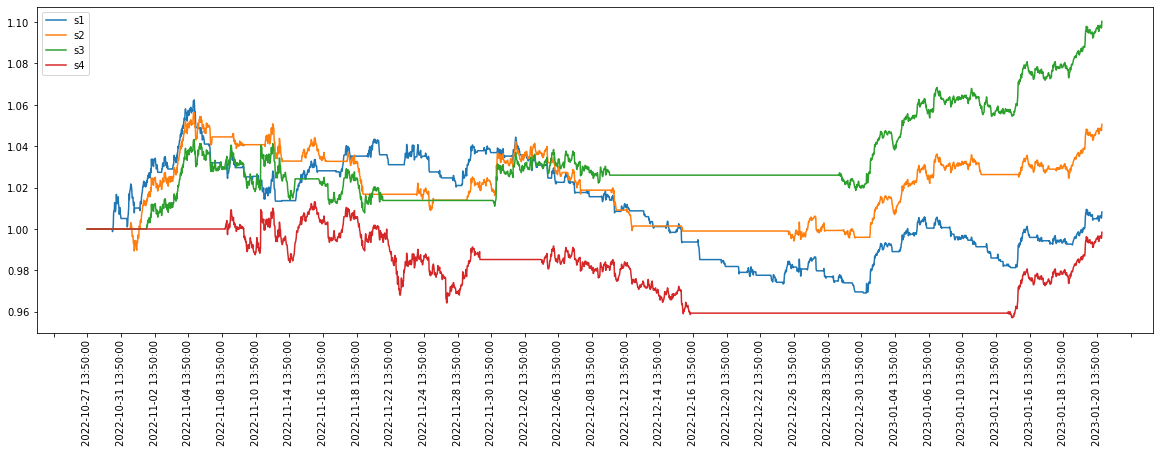

In [123]:
plt.rcParams["figure.figsize"] = (20,6)
df22 = df2[:]
df22["date"] = df22["day"].map(str)
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1)
ax.plot(df22["date"], df22["s1"], label=2)
ax.plot(df22["date"], df22["s2"], label=2) 
ax.plot(df22["date"], df22["s3"], label=2) 
ax.plot(df22["date"], df22["s4"], label=2) 


ax.xaxis.set_major_locator(ticker.MultipleLocator(base=96))
ax.legend(["s1", "s2", "s3", "s4"])
plt.xticks(rotation=90)
plt.show()
# 

/tmp/ipykernel_1466235/1303093702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22["date"] = df22["day"].map(str)


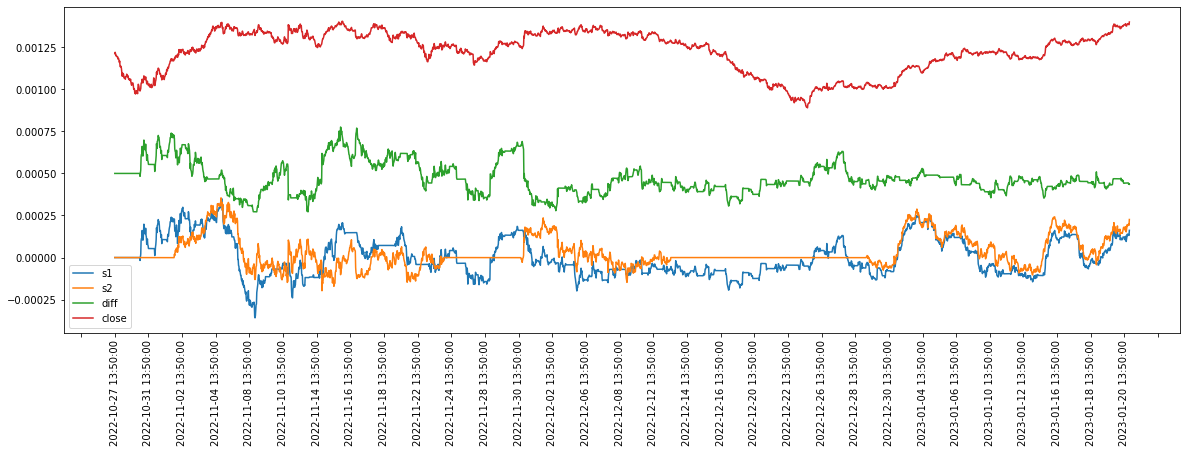

In [125]:
plt.rcParams["figure.figsize"] = (20,6)
df22 = df2[:]
df22["date"] = df22["day"].map(str)
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1)
ax.plot(df22["date"], df22["stra_1_amp"].rolling(96, min_periods=1).mean(), label=2)
# ax.plot(df22["date"], df22["stra_2_amp"].rolling(96, min_periods=1).mean(), label=2) 
# ax.plot(df22["date"], df22["stra_3_amp"].rolling(96, min_periods=1).mean(), label=2) 
ax.plot(df22["date"], df22["stra_3_amp"].rolling(96, min_periods=1).mean(), label=2) 
ax.plot(df22["date"], (df22["stra_1_amp"] - df22["stra_3_amp"]).rolling(96, min_periods=1).mean() + 0.0005, label=2)
ax.plot(df22["date"], df22["close"]/500 - 0.004 , label=2) 


ax.xaxis.set_major_locator(ticker.MultipleLocator(base=96))
ax.legend(["s1", "s2", "diff", "close"])
plt.xticks(rotation=90)
plt.show()